In [ ]:
# ! pip install inference
# ! pip install supervision
# ! pip install pillow-heif

In [5]:
# import a utility function for loading Roboflow models
from inference import get_model

# define the image url to use for inference
image = "https://media.roboflow.com/inference/people-walking.jpg"

# load a pre-trained yolov8n model
model = get_model(model_id="polerecog/1")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [6]:
results

[ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=1920, height=1080), predictions=[ObjectDetectionPrediction(x=1502.0, y=555.0, width=84.0, height=172.0, confidence=0.8134546279907227, class_name='person', class_confidence=None, class_id=0, tracker_id=None, detection_id='9892e9f9-01cd-464b-8bee-86599420fc96', parent_id=None), ObjectDetectionPrediction(x=1481.5, y=400.5, width=69.0, height=161.0, confidence=0.7922879457473755, class_name='person', class_confidence=None, class_id=0, tracker_id=None, detection_id='1b4a6816-d4e4-4829-89b4-cb6a3875c0f4', parent_id=None), ObjectDetectionPrediction(x=293.0, y=522.0, width=68.0, height=174.0, confidence=0.7694224119186401, class_name='person', class_confidence=None, class_id=0, tracker_id=None, detection_id='c809fd11-8a4e-46e2-a521-701a04666a88', parent_id=None), ObjectDetectionPrediction(x=704.5, y=749.5, width=79.0, height=201.0, confidence=0.7660658955574036

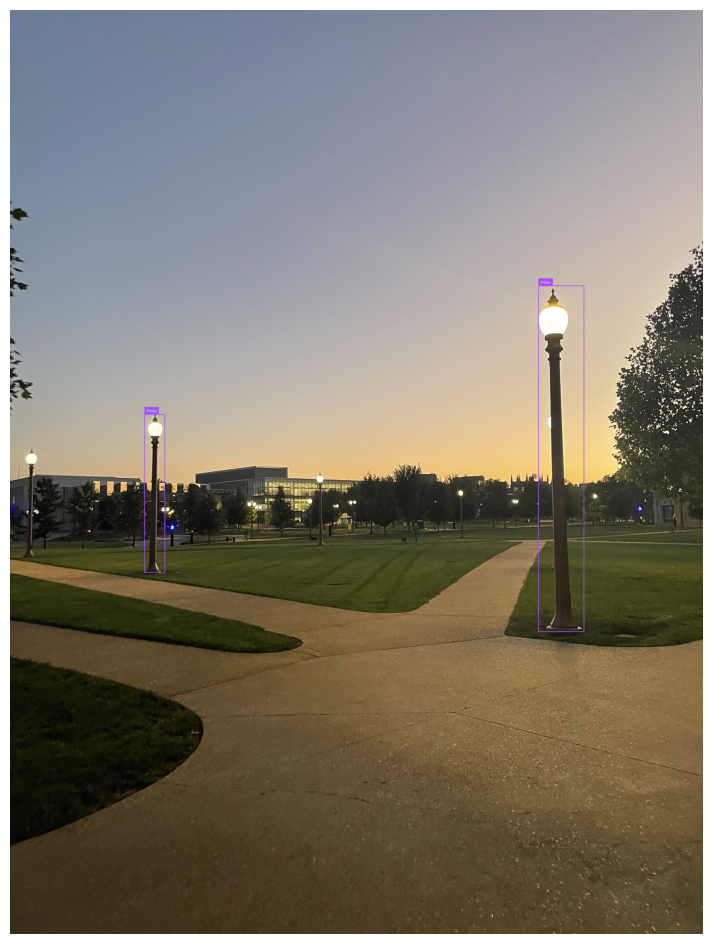

In [23]:
from io import BytesIO
import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile
import pillow_heif


# Register HEIC format with Pillow
pillow_heif.register_heif_opener()

def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image


# load the image
image = Image.open('/home/research/yu.zihao/IMG_5016.HEIC')

# load a pre-trained yolov8n model
model = get_model(model_id="polerecog/1", api_key='yLz49HYHQvyCT3LlzdEN')

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)

In [29]:
detections

Detections(xyxy=array([[2306., 1203., 2504., 2712.],
       [ 587., 1764.,  675., 2455.]]), mask=None, confidence=array([0.77900726, 0.54007035]), class_id=array([0, 0]), tracker_id=None, data={'class_name': array(['Poles', 'Poles'], dtype='<U5')})